<h1><center>Heart Failure Prediction</center></h1>
<h3><center>"I'm tired of working"</center></h3>
<center><img src='https://sinahealthtour.com/wp-content/uploads/2019/07/Untitled-1.jpg'></center>


# Summary

- [Libraries](#Libraries)

- [Data](#Data)

- [Data Analysis](#Data-Analysis)

- [Data Preparation](#Data-preparation)

- [Machine Learning Models](#Machine-Learning-Models)

- [Comparing models](#Comparing-models)

# Libraries

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report

# Data

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Analysis

## Age

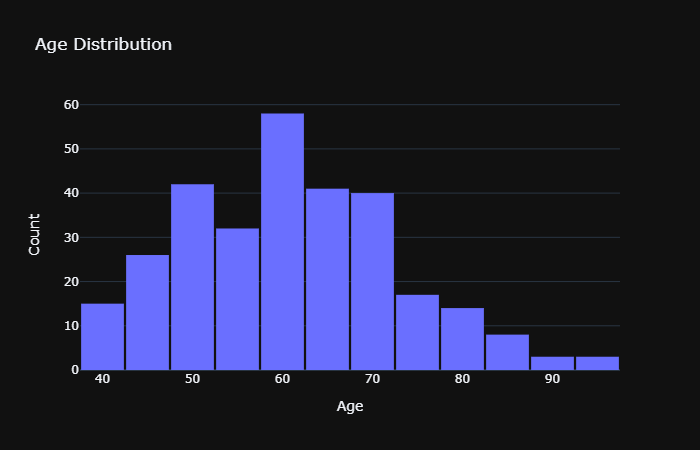

In [4]:
fig_age = go.Figure()

fig_age.add_trace(go.Histogram(x=data['age'],
                               marker_color='#6a6fff'))

fig_age.update_layout(
    title_text='Age Distribution',
    xaxis_title_text='Age',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_age.show('png')

## Anemia 

A condition in which the blood doesn't have enough healthy red blood cells.

["Anemia, or a low hemoglobin level in the blood, is often linked to heart disease because the heart has to work harder to pump more blood and oxygen through the body."](https://www.everydayhealth.com/heart-health/anemia.aspx#:~:text=Anemia%27s%20Impact%20on%20Heart%20Health&text=People%20who%20are%20anemic%20are,compared%20to%20those%20without%20anemia.)

In [5]:
normal = data[data['anaemia']==0]

anemia = data[data['anaemia']==1]

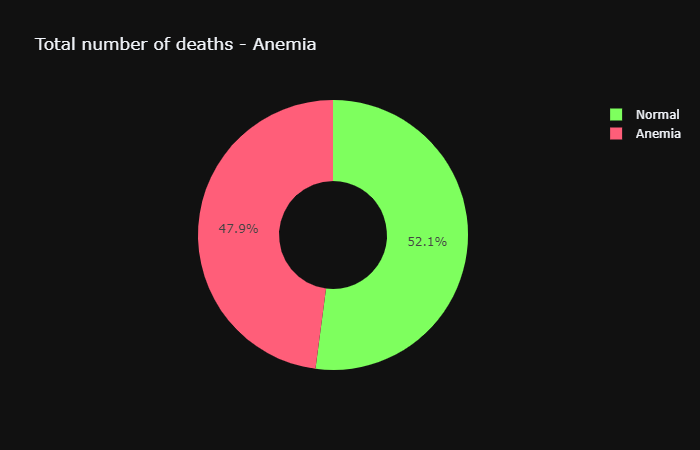

In [6]:
colors= ['#7eff5e', '#ff5e79']

labels = ['Normal', 'Anemia']

values = [len(normal[normal['DEATH_EVENT'] == 1]), 
          len(anemia[anemia['DEATH_EVENT'] == 1])]

fig_anemia = go.Figure()

fig_anemia.add_trace(go.Pie(labels=labels, values=values,
                            hole=.4, marker_colors=colors))

fig_anemia.update_layout(
    title_text='Total number of deaths - Anemia',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_anemia.show('png')

## Creatinine phosphokinase

The Creatine phosphokinase (CPK) is an enzyme found mainly in the heart, brain, and skeletal muscle and may indicate some type of injury to these muscles

**CPK normal value:** 

- 10 - 120 micrograms per liter (mcg/L)


**Abnormal values can indicates:**
- Brain injury or stroke
- Convulsions
- Delirium tremens
- Dermatomyositis or polymyositis
- Electric shock
- Heart attack*
- Inflammation of the heart muscle (myocarditis)
- Lung tissue death (pulmonary infarction)
- Muscular dystrophies
- Myopathy


For more information acess: [CPK](https://www.ucsfbenioffchildrens.org/tests/003503.html)

In [7]:
normal_cpk_level = data[(data['creatinine_phosphokinase'] >= 10) & 
                        (data['creatinine_phosphokinase'] <= 120)]

abnormal_cpk_level = data[(data['creatinine_phosphokinase'] < 10) | 
                          (data['creatinine_phosphokinase'] > 120)]

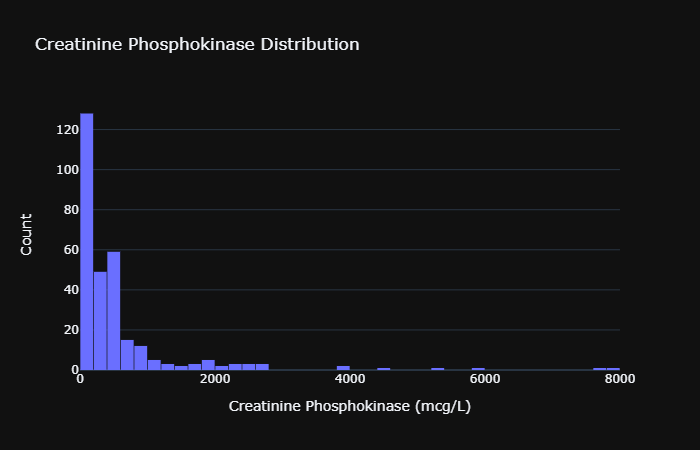

In [8]:
fig_creatinine = go.Figure()

fig_creatinine.add_trace(go.Histogram(x=data['creatinine_phosphokinase'],
                                      marker_color='#6a6fff'))

fig_creatinine.update_layout(
    title_text='Creatinine Phosphokinase Distribution',
    xaxis_title_text='Creatinine Phosphokinase (mcg/L)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_creatinine.show('png')

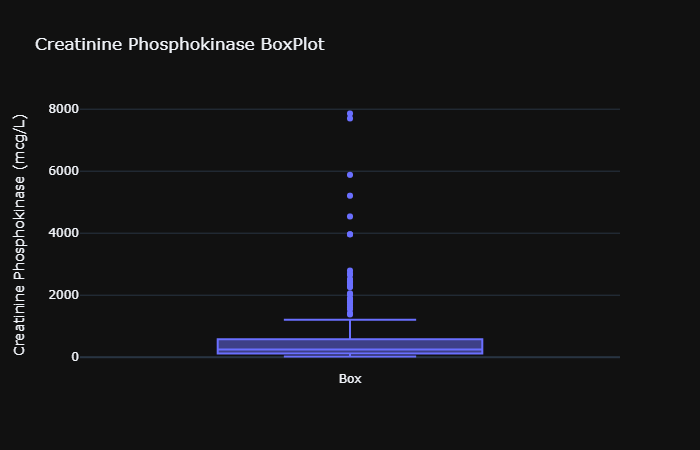

In [9]:
fig_creatinine = go.Figure()

fig_creatinine.add_trace(go.Box(y=data['creatinine_phosphokinase'], 
                                name='Box', marker_color='#6a6fff'))

fig_creatinine.update_layout(
    title_text='Creatinine Phosphokinase BoxPlot',
    yaxis_title_text='Creatinine Phosphokinase (mcg/L)', 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_creatinine.show('png')

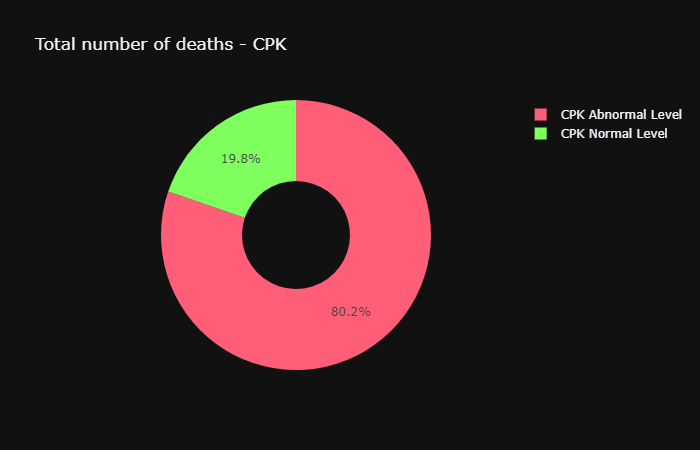

In [10]:
colors = ['#7eff5e', '#ff5e79']

labels = ['CPK Normal Level', 'CPK Abnormal Level']

values = [len(normal_cpk_level[normal_cpk_level['DEATH_EVENT'] == 1]),
          len(abnormal_cpk_level[abnormal_cpk_level['DEATH_EVENT'] == 1])]

fig_creatinine = go.Figure()

fig_creatinine.add_trace(go.Pie(labels=labels, values=values, 
                                hole=.4, marker_colors=colors))

fig_creatinine.update_layout(
    title_text='Total number of deaths - CPK',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_creatinine.show('png')

## Diabetes

Is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. 

["Diabetes and heart failure are linked; treatment should be too."](https://www.heart.org/en/news/2019/06/06/diabetes-and-heart-failure-are-linked-treatment-should-be-too#:~:text=People%20who%20have%20Type%202,a%20risk%20factor%20for%20diabetes.)

In [11]:
normal = data[data['diabetes']==0]

diabetes = data[data['diabetes']==1]

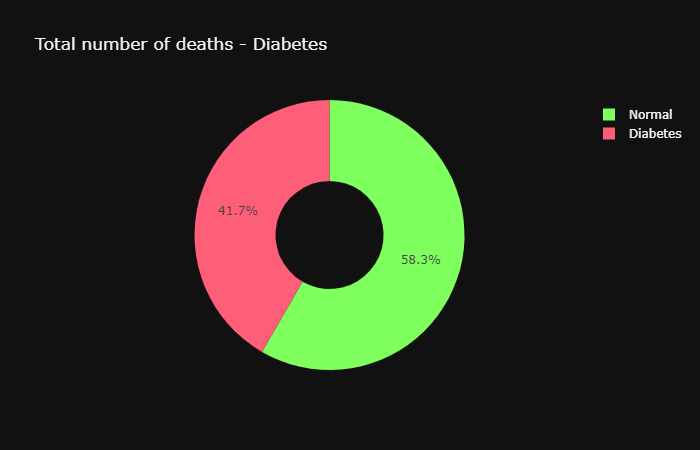

In [12]:
colors = ['#7eff5e', '#ff5e79']

labels = ['Normal', 'Diabetes']

values = [len(normal[normal['DEATH_EVENT'] == 1]), 
          len(diabetes[diabetes['DEATH_EVENT'] == 1])]

fig_diabetes = go.Figure()

fig_diabetes.add_trace(go.Pie(labels=labels, values=values,
                              hole=.4, marker_colors=colors))

fig_diabetes.update_layout(
    title_text='Total number of deaths - Diabetes',
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_diabetes.show('png')

## Ejection fraction
Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts.

The ejection fraction is usually measured only in the left ventricle (LV).

- An LV ejection fraction of 55 percent or higher is considered normal.
- An LV ejection fraction of 50 percent or lower is considered reduced.
- An LV ejection fraction between 50 and 55 percent is usually considered "borderline.""

Some things that may cause a reduced ejection fraction are:

- Weakness of the heart muscle, such as cardiomyopathy
- Heart attack that damaged the heart muscle
- Heart valve problems
- Long-term, uncontrolled high blood pressure

For more information acess: [Ejection fraction](https://www.mayoclinic.org/ejection-fraction/expert-answers/faq-20058286#:~:text=The%20ejection%20fraction%20is%20usually,or%20higher%20is%20considered%20normal.)

In [13]:
normal_ejection_fract = data[data['ejection_fraction'] >= 55]

reduced_ejection_fract = data[data['ejection_fraction'] <= 50]

borderline_ejection_fract = data[(data['ejection_fraction'] < 55) & 
                                 (data['ejection_fraction'] > 50)]

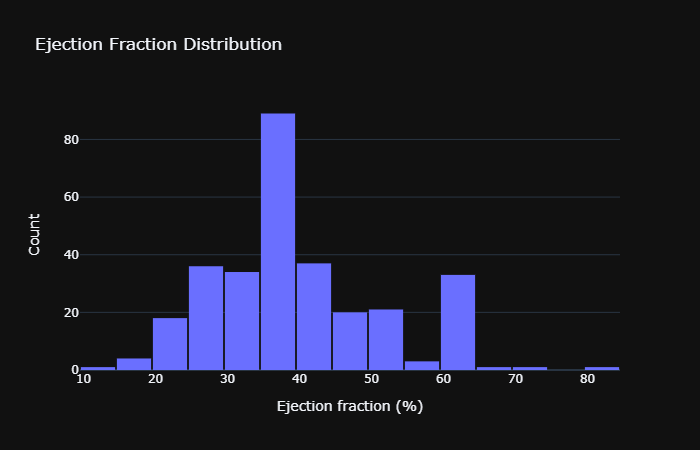

In [14]:
fig_eject_fract = go.Figure()

fig_eject_fract.add_trace(go.Histogram(x=data['ejection_fraction'],
                                      marker_color='#6a6fff'))

fig_eject_fract.update_layout(
    title_text='Ejection Fraction Distribution',
    xaxis_title_text='Ejection fraction (%)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, height=600
)

fig_eject_fract.show('png')

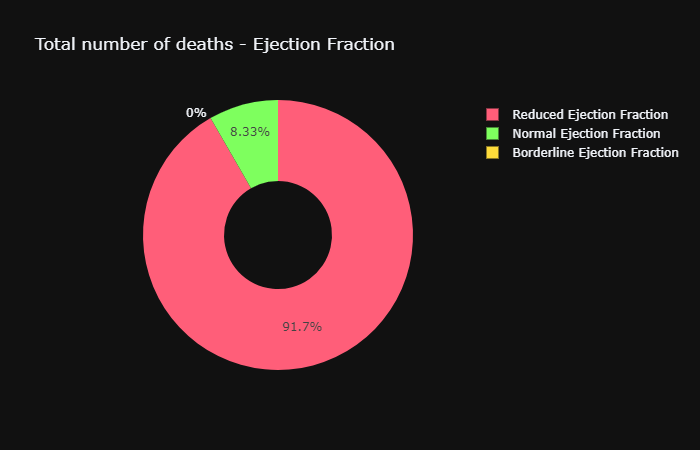

In [15]:
colors = ['#7eff5e', '#ff5e79', '#fddb3a']

labels = ['Normal Ejection Fraction', 'Reduced Ejection Fraction', 
          'Borderline Ejection Fraction ']

values = [len(normal_ejection_fract[normal_ejection_fract['DEATH_EVENT']==1]),
          len(reduced_ejection_fract[reduced_ejection_fract['DEATH_EVENT']==1]),
          len(borderline_ejection_fract[borderline_ejection_fract['DEATH_EVENT']==1])]

fig_eject_fract = go.Figure()

fig_eject_fract.add_trace(go.Pie(labels=labels, values=values,
                         hole=.4, marker_colors=colors))

fig_eject_fract.update_layout(
    title_text='Total number of deaths - Ejection Fraction',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_eject_fract.show('png')

## High blood pressure

Is a common condition in which the long-term force of the blood against your artery walls is high enough that it may eventually cause health problems, such as heart disease.

["How High Blood Pressure Can Lead to Heart Failure"](https://www.heart.org/en/health-topics/high-blood-pressure/health-threats-from-high-blood-pressure/how-high-blood-pressure-can-lead-to-heart-failure#:~:text=Heart%20failure%2C%20a%20condition%20where,risk%20of%20developing%20heart%20failure.)

In [16]:
normal_blood_pressure = data[data['high_blood_pressure'] == 0]

high_blood_pressure = data[data['high_blood_pressure'] == 1]

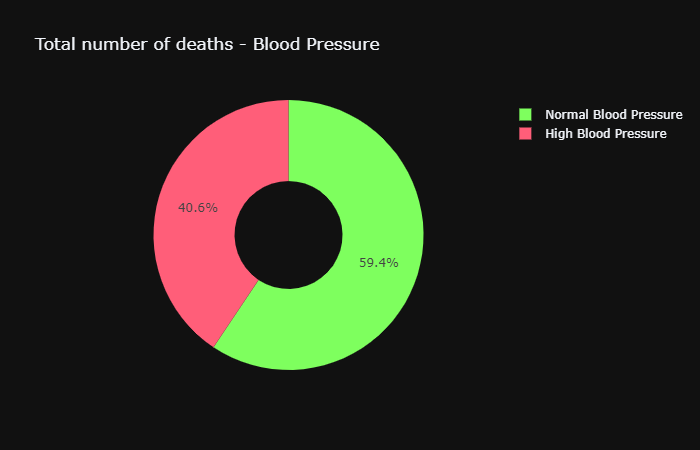

In [17]:
color = ['#7eff5e', '#ff5e79']

labels = ['Normal Blood Pressure', 'High Blood Pressure']

values = [len(normal_blood_pressure[normal_blood_pressure['DEATH_EVENT'] == 1]), 
          len(high_blood_pressure[high_blood_pressure['DEATH_EVENT'] == 1])]

fig_pressure = go.Figure()

fig_pressure.add_trace(go.Pie(labels=labels, values=values,
                             hole=.4, marker_colors=colors))

fig_pressure.update_layout(
    title_text='Total number of deaths - Blood Pressure',
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_pressure.show('png')

## Platelets

Platelets are parts of the blood that helps the blood clot.

**Normal number of platelets**: 150.000 to 400.000

["Platelets and Cardiovascular Disease"](https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.0000086897.15588.4B)

In [18]:
normal_platelets_level = data[(data['platelets'] >= 150000) & (data['platelets'] <= 450000)]

abnormal_platelets_level = data[(data['platelets'] < 150000) | (data['platelets'] > 450000)]

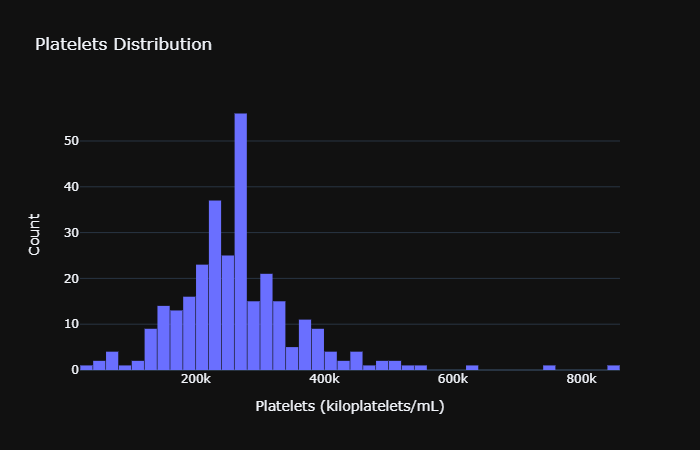

In [19]:
fig_platelets = go.Figure()

fig_platelets.add_trace(go.Histogram(x=data['platelets'], 
                                      marker_color='#6a6fff'))

fig_platelets.update_layout(
    title_text='Platelets Distribution',
    xaxis_title_text='Platelets (kiloplatelets/mL)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_platelets.show('png')

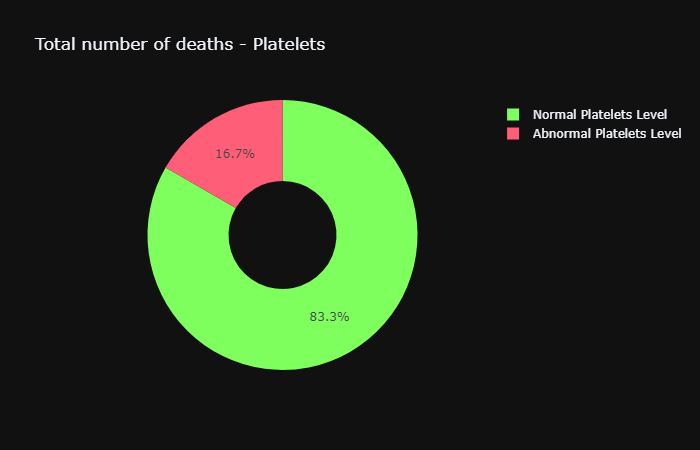

In [20]:
colors = ['#7eff5e', '#ff5e79']

labels = ['Normal Platelets Level', 'Abnormal Platelets Level']

values = [len(normal_platelets_level[normal_platelets_level['DEATH_EVENT']==1]),
          len(abnormal_platelets_level[abnormal_platelets_level['DEATH_EVENT']==1])]

fig_platelets = go.Figure()

fig_platelets.add_trace(go.Pie(labels=labels, values=values, 
                         hole=.4, marker_colors=colors))

fig_platelets.update_layout(
    title_text='Total number of deaths - Platelets',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_platelets.show('png')

## Serum creatinine

Can indicate whether your kidneys are working properly. 

**Normal range:** 0.7 to 1.2 (mg/dL)

["Beware the rising creatinine level"](https://doi.org/10.1054/jcaf.2003.10)

In [21]:
normal_range_creatinine = data[(data['serum_creatinine'] >= 0.7) & (data['serum_creatinine'] <= 1.2)]

out_range_creatinine = data[(data['serum_creatinine'] < 0.7) | (data['serum_creatinine'] > 1.2)]

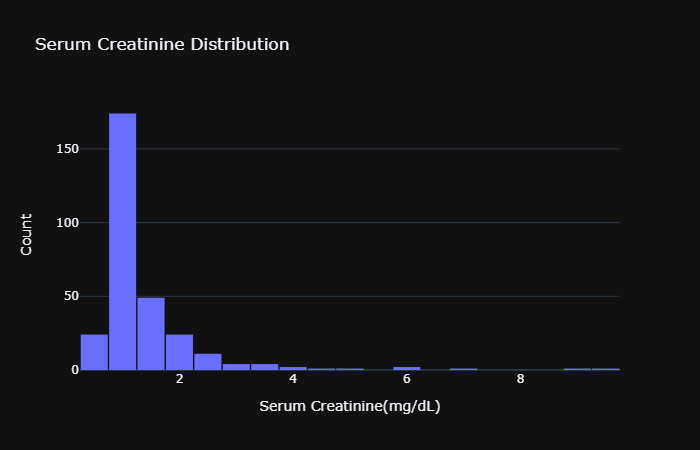

In [22]:
fig_creatinine = go.Figure()

fig_creatinine.add_trace(go.Histogram(x=data['serum_creatinine'], 
                                      marker_color='#6a6fff'))

fig_creatinine.update_layout(
    title_text='Serum Creatinine Distribution',
    xaxis_title_text='Serum Creatinine(mg/dL)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_creatinine.show('png')

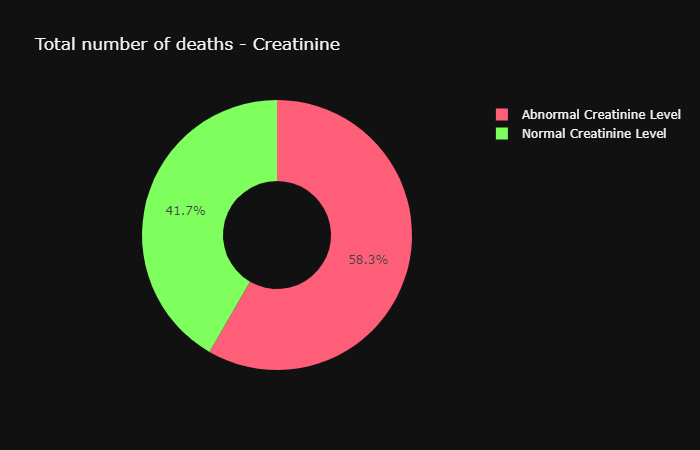

In [23]:
colors = ['#7eff5e', '#ff5e79']

labels = ['Normal Creatinine Level', 'Abnormal Creatinine Level']

values = [len(normal_range_creatinine[normal_range_creatinine['DEATH_EVENT']==1]),
          len(out_range_creatinine[out_range_creatinine['DEATH_EVENT']==1])]

fig_creatinine = go.Figure()

fig_creatinine.add_trace(go.Pie(labels=labels, values=values, 
                         hole=.4, marker_colors=colors))

fig_creatinine.update_layout(
    title_text='Total number of deaths - Creatinine',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_creatinine.show('png')

## Serum sodium

A sodium blood test is a routine test that allows your doctor to see how much sodium is in your blood. 

**Normal range:**  135 to 145 mEq/L

In [24]:
normal_sodium_level = data[(data['serum_sodium'] >= 135) & (data['serum_sodium'] <= 145)]
abnormal_sodium_level = data[(data['serum_sodium'] < 135) | (data['serum_sodium'] > 145)]

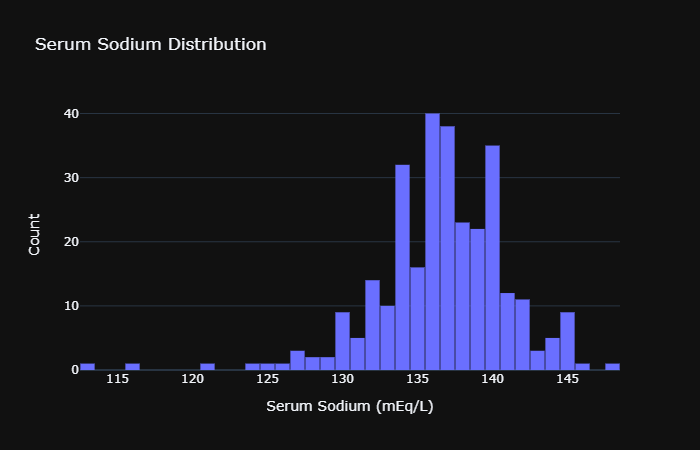

In [25]:
fig_sodium = go.Figure()

fig_sodium.add_trace(go.Histogram(x=data['serum_sodium'], 
                                  marker_color='#6a6fff'))

fig_sodium.update_layout(
    title_text='Serum Sodium Distribution',
    xaxis_title_text='Serum Sodium (mEq/L)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_sodium.show('png')

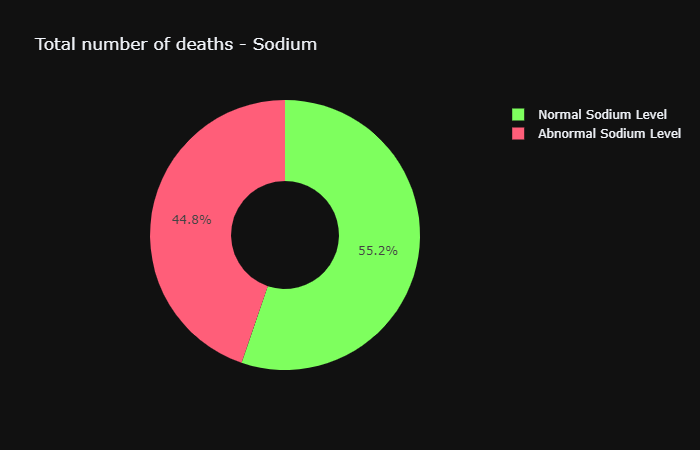

In [26]:
colors = ['#7eff5e', '#ff5e79']

labels = ['Normal Sodium Level', 'Abnormal Sodium Level']

values = [len(normal_sodium_level[normal_sodium_level['DEATH_EVENT']==1]),
          len(abnormal_sodium_level[abnormal_sodium_level['DEATH_EVENT']==1])]

fig_sodium = go.Figure()

fig_sodium.add_trace(go.Pie(labels=labels, values=values, 
                         hole=.4, marker_colors=colors))

fig_sodium.update_layout(
    title_text='Total number of deaths - Sodium',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_sodium.show('png')

## Sex

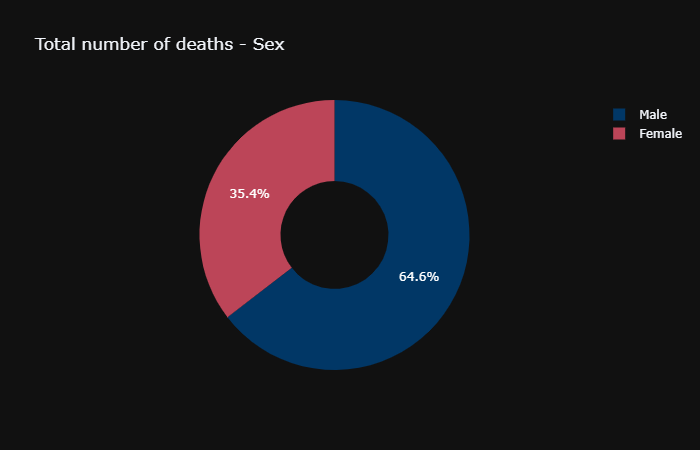

In [27]:
colors = ['#013766', '#bc4558']

labels = ['Male', 'Female']

values = [len(data[(data['DEATH_EVENT'] == 1) & (data['sex'] == 1)]), 
          len(data[(data['DEATH_EVENT'] == 1) & (data['sex'] == 0)])]

fig_sex = go.Figure()

fig_sex.add_trace(go.Pie(labels=labels, values=values, 
                         hole=.4, marker_colors=colors))

fig_sex.update_layout(
    title_text='Total number of deaths - Sex',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_sex.show('png')

## Smoking

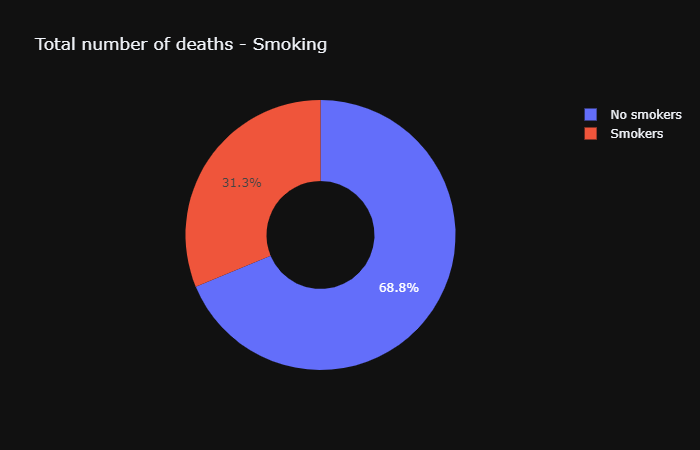

In [28]:
labels = ['Smokers', 'No smokers']

values = [len(data[(data['DEATH_EVENT'] == 1) & (data['smoking'] == 1)]), 
          len(data[(data['DEATH_EVENT'] == 1) & (data['smoking'] == 0)])]

fig_smoking = go.Figure()

fig_smoking.add_trace(go.Pie(labels=labels, values=values,
                            hole=.4))

fig_smoking.update_layout(
    title_text='Total number of deaths - Smoking',
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_smoking.show('png')

## Time

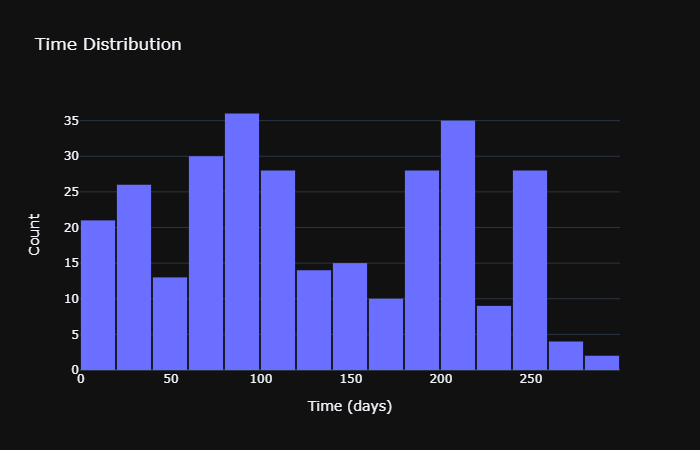

In [29]:
fig_time = go.Figure()

fig_time.add_trace(go.Histogram(x=data['time'], 
                                marker_color='#6a6fff'))

fig_time.update_layout(
    title_text='Time Distribution',
    xaxis_title_text='Time (days)',
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_time.show('png')

## Death event

In [30]:
survived = data[data['DEATH_EVENT'] == 0]

dead = data[data['DEATH_EVENT'] == 1]

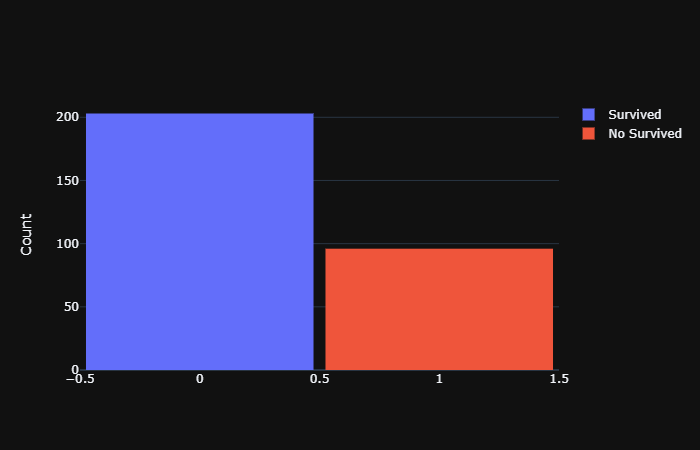

In [31]:
fig_target = go.Figure()

fig_target.add_trace(go.Histogram(x=survived['DEATH_EVENT'], 
                                  name='Survived'))

fig_target.add_trace(go.Histogram(x=dead['DEATH_EVENT'], 
                                  name='No Survived'))

fig_target.update_layout(
    yaxis_title_text='Count', 
    bargap=0.05, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_target.show('png')

## Death event - Pairplot


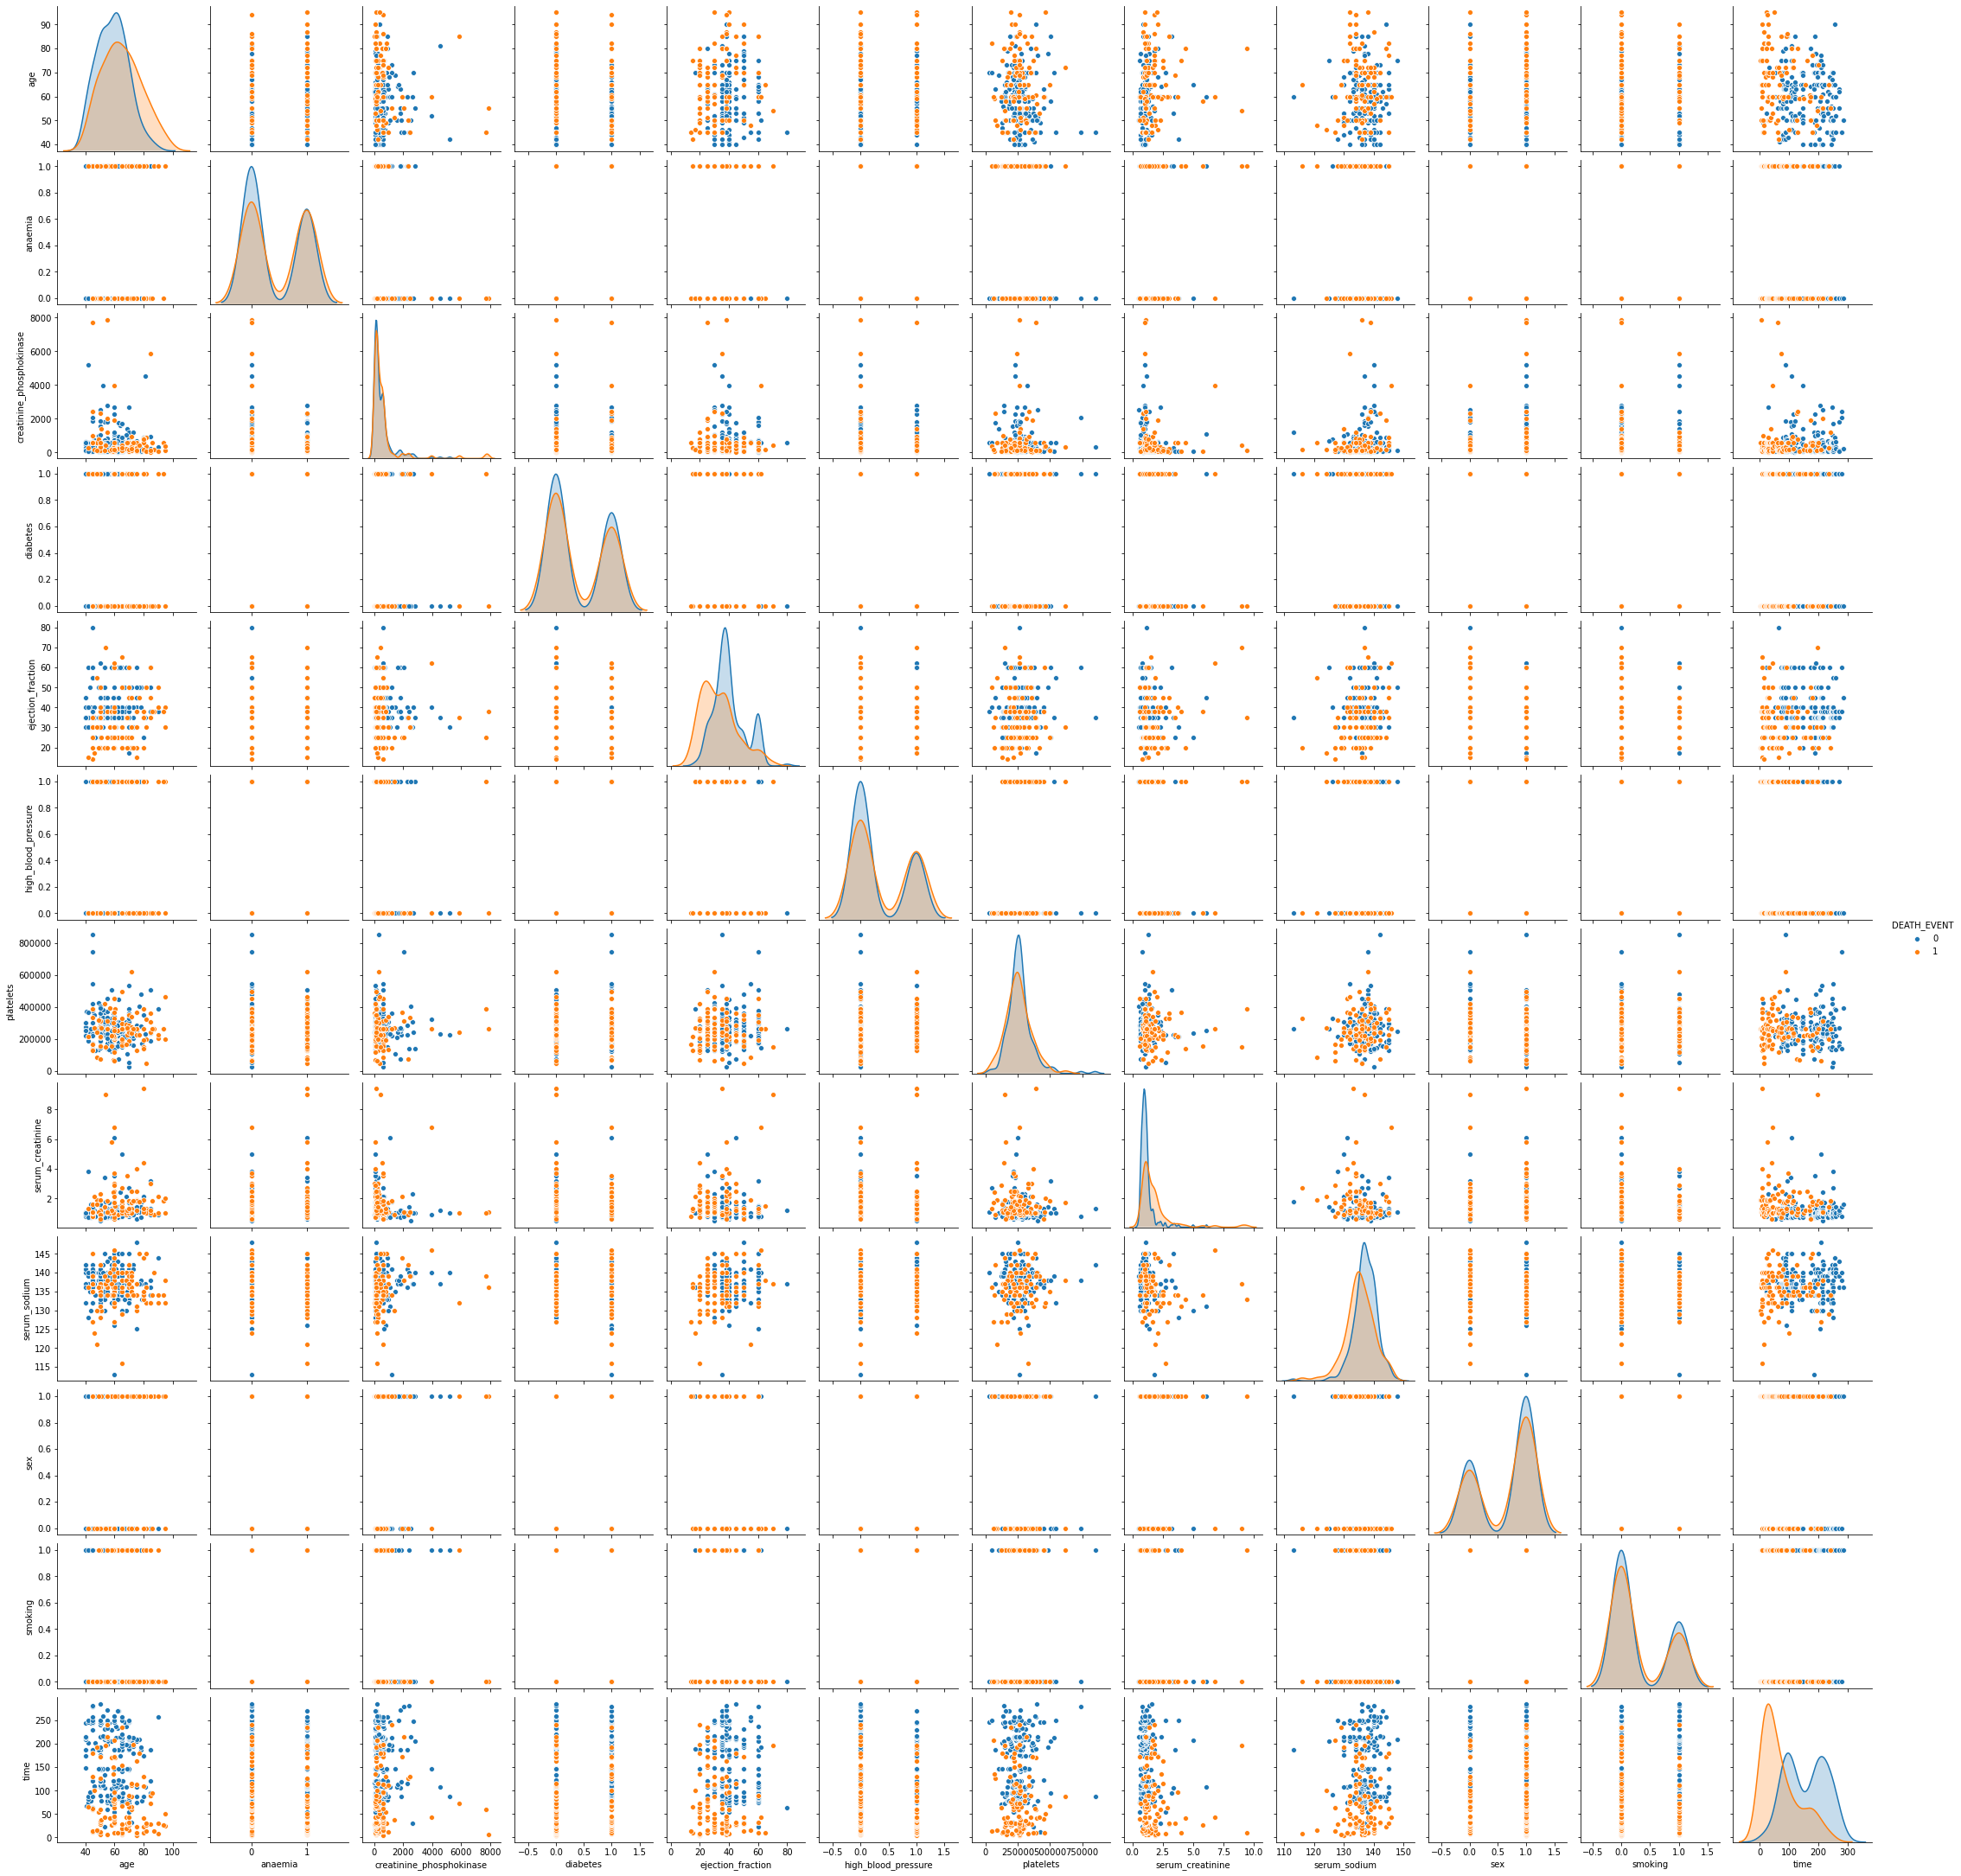

In [32]:
sns.pairplot(data, hue='DEATH_EVENT')

## Correlation

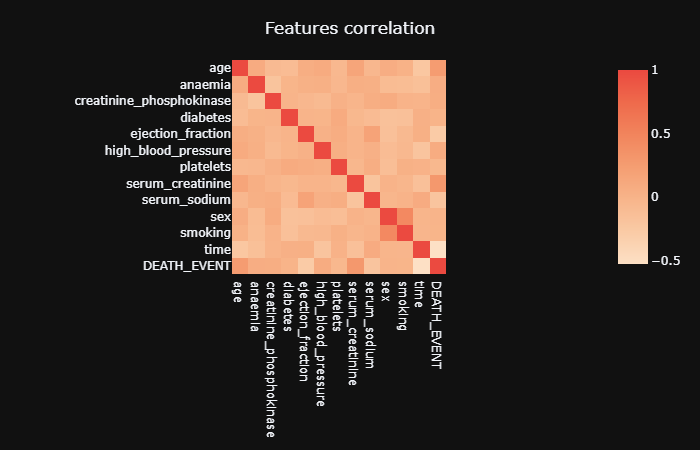

In [33]:
fig_corr = px.imshow(data.corr(), color_continuous_scale='peach')

fig_corr.update_layout(
    title={
        'text': "Features correlation",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    template = 'plotly_dark',
    width=750, 
    height=600
)

fig_corr.show('png')

### **IMPORTANT NOTE** : In the most part of cases we want to remove the outliers in our data set, but in this case the abnormal values of CPK, Serum Sodium, Serum Creatinine and Ejection Fraction indicate a healts problems, so maintain the outliers in this case is completely necessary for our analysis and predctions.


# Data preparation

## Feature selection

I'll use two differents tests to select six features for our models:

- ANOVA test for numerical features

- Chi2 test for categorical features

In [34]:
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium',
                      'time']

categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure',
                        'sex', 'smoking']

numerical_selector = SelectKBest(f_classif, k=3)

categorical_selector =  SelectKBest(chi2, k=3)

X_numerical = numerical_selector.fit_transform(data[numerical_features], 
                                                  data['DEATH_EVENT'])

X_categorical = categorical_selector.fit_transform(data[categorical_features],
                                                    data['DEATH_EVENT'])

print('Numerical features selected:', data[numerical_features].columns[numerical_selector.get_support()].to_list())

print('Categorical features selected:', data[categorical_features].columns[categorical_selector.get_support()].to_list())

Numerical features selected: ['ejection_fraction', 'serum_creatinine', 'time']
Categorical features selected: ['anaemia', 'high_blood_pressure', 'smoking']


In [35]:
X_selected = data[['ejection_fraction', 'serum_creatinine', 'time',
                   'anaemia', 'high_blood_pressure', 'smoking']]

## Standardzing the data

In [36]:
scaler = StandardScaler()

scaler.fit(X_selected)

X_scaled = scaler.transform(X_selected)

## Balancing the target

In [37]:
smt = SMOTETomek()

X_scaled, y_balanced = smt.fit_resample(X_scaled, data['DEATH_EVENT'])

# Machine Learning Models

## Creating models

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.3, stratify=y_balanced)

###  Random Forest Classifier

In [39]:
rfc_parameters = {'n_estimators' : [10, 20, 50, 100],
                  'criterion' : ['gini', 'entropy'],
                  'max_depth' : [3, 5, 7, 9, 10]
                 }

grid_search_rfc = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = rfc_parameters,
                           cv = 10,
                           n_jobs = -1)

grid_search_rfc.fit(X_train, y_train)

rfc = grid_search_rfc.best_estimator_

y_pred_rfc = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

rfc_cv_score = cross_val_score(rfc, X_scaled, y_balanced, cv=10).mean()

In [40]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.88      0.88      0.88        57

    accuracy                           0.88       113
   macro avg       0.88      0.88      0.88       113
weighted avg       0.88      0.88      0.88       113



### K-Nearest Neighbors

In [41]:
knn_parameters = {'n_neighbors' : [i for i in range(1, 40)]}

grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = knn_parameters,
                           cv = 10,
                           n_jobs = -1)

grid_search_knn.fit(X_train, y_train)

knn = grid_search_knn.best_estimator_

y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)

knn_cv_score = cross_val_score(knn, X_scaled, y_balanced, cv=10).mean()

In [42]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        56
           1       0.87      0.84      0.86        57

    accuracy                           0.86       113
   macro avg       0.86      0.86      0.86       113
weighted avg       0.86      0.86      0.86       113



# Comparing models

## With AUC

### Defining probabilities

In [43]:
no_skill = [0 for _ in range(len(y_test))]

rfc_probs = rfc.predict_proba(X_test)

rfc_probs = rfc_probs[:, 1]

knn_probs = knn.predict_proba(X_test)

knn_probs = knn_probs[:, 1]

### Evaluating AUC score

In [44]:
rfc_auc = roc_auc_score(y_test, rfc_probs)

knn_auc = roc_auc_score(y_test, knn_probs)

print('(RFC) ROC AUC score:', rfc_auc)

print('(KNN) ROC AUC score:', knn_auc)

(RFC) ROC AUC score: 0.9578634085213033
(KNN) ROC AUC score: 0.8585526315789473


### Defining False Positive and True Positive rates

In [45]:
ns_fpr, ns_tpr, a =  roc_curve(y_test, no_skill)

rfr_fpr, rfr_tpr, a =  roc_curve(y_test, rfc_probs)

knn_fpr, knn_tpr, a =  roc_curve(y_test, knn_probs)

### Comparing models with AUC

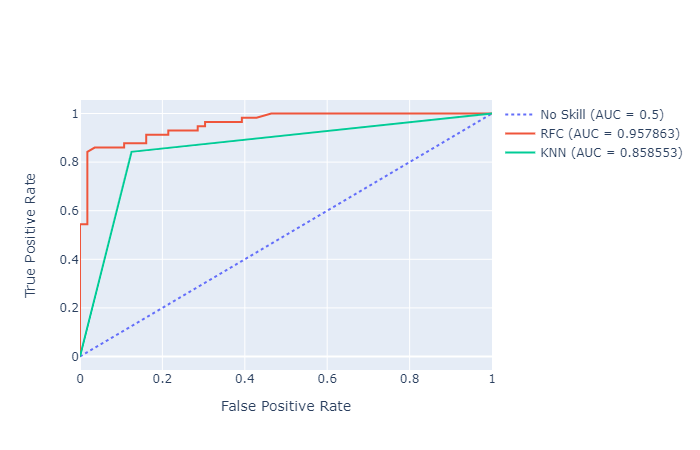

In [46]:
fig_auc = go.Figure()

fig_auc.add_trace(go.Scatter(x=ns_fpr, y=ns_tpr, mode='lines',line_dash='dot', 
                             name = 'No Skill (AUC = 0.5)'))

fig_auc.add_trace(go.Scatter(x=rfr_fpr, y=rfr_tpr, mode='lines', 
                             name=('RFC (AUC = %f)' %rfc_auc)))

fig_auc.add_trace(go.Scatter(x=knn_fpr, y=knn_tpr, mode='lines', 
                             name=('KNN (AUC = %f)' %knn_auc)))

fig_auc.update_layout(xaxis_title = 'False Positive Rate', 
                      yaxis_title='True Positive Rate', 
                      width=700, height=500)

fig_auc.show('png')

## With DataFrame

In [47]:
models = [('RFC', rfc_accuracy, rfc_cv_score), 
          ('KNN', knn_accuracy, knn_cv_score)]

model_comparasion = pd.DataFrame(models, columns=['Model', 'Accuracy Score', 'CV Score'])

model_comparasion.head()

,Model,Accuracy Score,CV Score
0,RFC,0.876106,0.837909
1,KNN,0.858407,0.880156
